In [28]:
# JG 11/8/17
# Updated 5/2/18 with depth profiles and fixed names on the correlation plot.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy import stats

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import anova
from statsmodels.graphics.factorplots import interaction_plot

%matplotlib inline
c_map = sns.color_palette('RdYlBu',99)
#sns.palplot(c_map)

### Correlation Plot for Environmental Variables

In [17]:
map_df = pd.read_csv('../../Metadata/ibp_metadata_4.17.18.txt', sep='\t')
print(map_df.columns)

to_remove = ['SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'Well', 'MicroNum', 
'Soil_type_color_id','Soil_type_and_color','USDA_soil_series','Elevation_WT', 'Dist_to_Whipple', 'Dist_to_WT', 'Dist_to_pond', 'Dist_to_highway','Description']
map_df_reduced = map_df.drop(to_remove, axis=1,inplace=False)
new_cols = ['Well #', 'Sample Depth', 'Elevation', 'Ksat', 'pH', 'Organic matter %',
       'Inundation Fraction', 'Pb', 'Cu', 'Fe', 'Zn', 'Ca', 'K',
       'Mg', 'P', 'Na']

map_df_reduced.columns = new_cols


Index(['SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'Well', 'WLWNum',
       'MicroNum', 'cum_depth', 'z', 'Soil_type_color_id',
       'Soil_type_and_color', 'USDA_soil_series', 'Ksat', 'pH',
       'Organic_matter', 'Elevation_WT', 'inundation_fraction-year_average',
       'Dist_to_Whipple', 'Dist_to_WT', 'Dist_to_pond', 'Dist_to_highway',
       'Pb', 'Cu', 'Fe', 'Zn', 'Ca', 'K', 'Mg', 'P', 'Na', 'Description'],
      dtype='object')


In [13]:
corr_df

,Well #,Sample Depth,Elevation,Ksat,pH,Organic matter %,Inundation Fraction,Pb,Cu,Fe,Zn,Ca,K,Mg,P,Na
Well #,1.000000,-0.039573,0.507783,0.351707,-0.316820,0.042619,-0.249961,0.069057,-0.306899,-0.429910,0.007914,-0.315021,-0.315021,-0.386010,-0.080279,-0.218261
Sample Depth,-0.039573,1.000000,-0.534937,0.167241,0.367894,-0.583816,0.820254,-0.505277,0.013910,0.138785,-0.147197,0.308510,0.308510,0.425175,-0.321821,0.121743
Elevation,0.507783,-0.534937,1.000000,0.435089,-0.778792,0.336832,-0.747327,0.289603,-0.496942,-0.380968,-0.035863,-0.510538,-0.510538,-0.609705,0.041699,-0.421434
Ksat,0.351707,0.167241,0.435089,1.000000,-0.530213,-0.209135,-0.132209,-0.174401,-0.427108,-0.311044,0.042628,-0.371626,-0.371626,-0.326573,-0.277270,-0.263183
pH,-0.316820,0.367894,-0.778792,-0.530213,1.000000,-0.367313,0.637142,-0.214679,0.421241,0.415645,-0.078559,0.507269,0.507269,0.569012,-0.037334,0.483194
Organic matter %,0.042619,-0.583816,0.336832,-0.209135,-0.367313,1.000000,-0.473871,0.778464,0.281500,0.065217,0.306326,-0.069670,-0.069670,-0.171930,0.699103,-0.061518
Inundation Fraction,-0.249961,0.820254,-0.747327,-0.132209,0.637142,-0.473871,1.000000,-0.343624,0.284324,0.239004,-0.123479,0.439544,0.439544,0.539511,-0.149449,0.308409
Pb,0.069057,-0.505277,0.289603,-0.174401,-0.214679,0.778464,-0.343624,1.000000,0.464672,0.116475,0.363380,0.017870,0.017870,-0.132472,0.749289,-0.014075
Cu,-0.306899,0.013910,-0.496942,-0.427108,0.421241,0.281500,0.284324,0.464672,1.000000,0.340478,0.412379,0.232864,0.232864,0.277033,0.426488,0.287498
Fe,-0.429910,0.138785,-0.380968,-0.311044,0.415645,0.065217,0.239004,0.116475,0.340478,1.000000,0.174390,0.435566,0.435566,0.594703,0.352744,0.459295


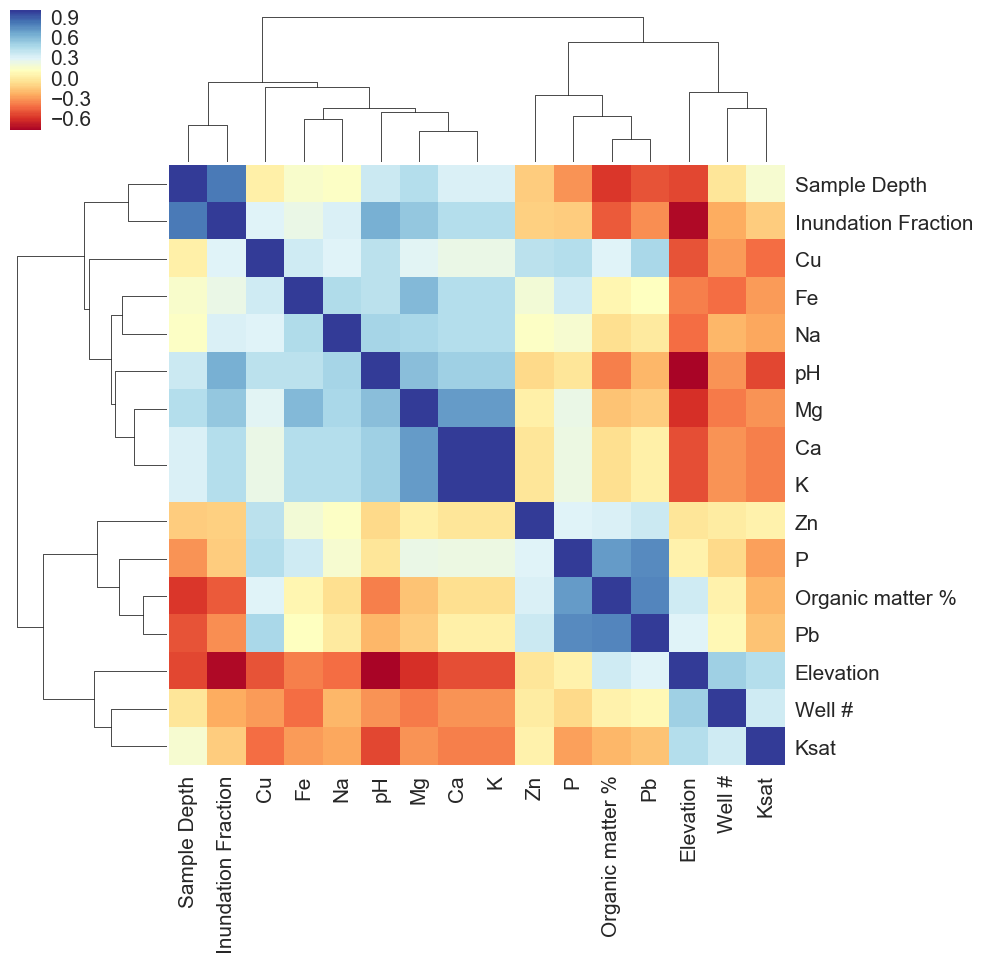

In [8]:
sns.set(font_scale=1.5)
#c_map = sns.diverging_palette(240, 10,s=99,as_cmap=True)

corr_df = map_df_reduced.corr()
clustermap = sns.clustermap(corr_df,cmap=c_map)
clustermap.savefig('../../output/parameter_clustering_v2.png', dpi=300)

In [29]:
# Parameter clustering -> 
# 1. pH strongly correlated with cation exchange capacity and increasing depth (Mg, Ca, K, Na)
# 2. Inindution fraction & distance to water table are highly correlated (Surprising how linear this response is)
# 3. Organic matter, Pb, P and Z all higher near surface.

# 4. Lots of colinear environmental variables. 
# 5. Upper horizons have most amount of leaching and acidity due to carbonic acid, 
# so positive link between depth and ph is expected/previously described.


### Depth profiles for some environmental variables

In [88]:
#1. groupby soiltype, then groupby depth and average?

# Variable of interest:
# Just do both separately for now:
#variable = 'pH '
variable = 'inundation_fraction-year_average'
# Dictionaries for average and std.dev. values keyed by soiltype
IF_means = {}
IF_stds = {}

soil_type_groups = map_df.groupby('USDA_soil_series')

for i,g in soil_type_groups:
    depth_mean = []
    depth_std = []
    
    # Create a list 
    for x in range(1,13):
        depth_mean.append ( g[ g ['MicroNum'] == x][variable].mean() ) 
        depth_std.append( g[ g ['MicroNum'] == x][variable].std() )
    
    # Add values to dictionaries
    IF_means[i] = depth_mean
    IF_stds[i] = depth_std



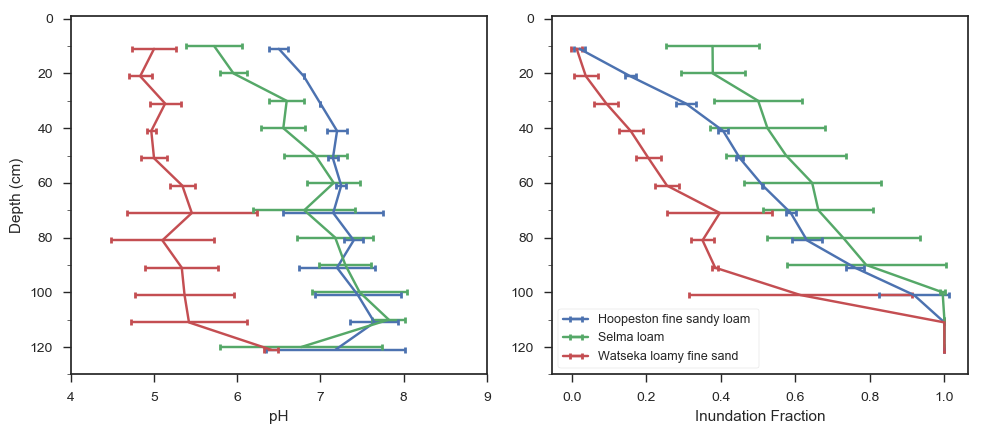

In [105]:
## 2 panel plot of pH and inundation by depth and soil type:

sns.set(font_scale=1)
sns.set_style('ticks')
f,axs = plt.subplots(1,2, figsize=(10,4.5))

axs = axs.reshape(-1)
y_values = list(range(10,130,10))
jitter = [1,0,1]

both_vars = [means, IF_means]
both_stds = [stds, IF_stds]

j=0
for ax in axs:
    panel_var = both_vars[j]
    panel_std = both_stds[j]

    i = 0    
    for key,val in panel_var.items():
        jittered_y = [x + jitter[i] for x in y_values]
        x_stds = panel_std[key]
        ax.errorbar(x=val, y=jittered_y,xerr=x_stds, label = key, capthick=2, capsize=2)
        i+=1
    
    # Fix y-axes on both panels
    minorLocator = AutoMinorLocator(2)   
    ax.yaxis.set_minor_locator(minorLocator)
    ax.set_ylim([-1,130])
    ax.invert_yaxis()
    
    j+=1

axs[0].set_ylabel('Depth (cm)')
axs[0].set_xlim([4,9])
axs[0].set_xlabel('pH')
axs[1].set_xlabel('Inundation Fraction')
axs[1].legend(loc=3, frameon=True,fontsize=9 )
f.tight_layout()
f.savefig('../output/Important_soil_prop_depth_type_gradients.png', dpi=400)

In [ ]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)

In [12]:
depth_incs = map_df.groupby('MicroNum')
for i, depth in depth_incs:
    print(depth['Organic_matter'].mean())

10.1131390874
6.61578947368
3.449477735
2.65912444658
1.01
0.826315789474
1.80516767441
1.07894736842
1.24444444444
1.5
1.27777777778
1.17894736842


In [4]:
# Merging and Normalizing Metadata
other_metadata_path = '../Metadata/Metadata-IBP_3.txt'

In [5]:
map2 = pd.read_csv(other_metadata_path, sep='\t')

In [9]:
map2.columns

Index(['#SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'Well',
       'WLWNum', 'MicroNum', 'Cumm_Depth', 'Elevation', 'Depth', 'Soil_Type',
       'Dist_Ext_WT', 'Inundation_Frac', 'Dry_Frac', 'Pb_Con', 'CU_Conc',
       'Fe_Conc', 'Zn_Conc', 'Ca_Conc', 'K_conc', 'Mg_Conc', 'P_Conc',
       'Na_Conc', 'Description'],
      dtype='object')

In [26]:
inundation = {}
for value in map_df['USDA_soil_series'].unique():
    inundation[value] = map_df[map_df['USDA_soil_series'] == value]['inundation_fraction-year_average'].values.tolist()



In [31]:
stats.f_oneway(inundation['Hoopeston fine sandy loam'], inundation['Watseka loamy fine sand'], inundation['Selma loam'])

F_onewayResult(statistic=25.302684632955025, pvalue=1.2997378567775255e-10)

In [29]:
inundation.keys()

dict_keys(['Hoopeston fine sandy loam', 'Watseka loamy fine sand', 'Selma loam'])